In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn import tree

In [2]:
df = pd.read_csv('D:\\24 - Machine_Learning\\download files\\AirQualityUCI.csv')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [4]:
df.shape

(9471, 17)

In [5]:
df.isnull()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9467,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9468,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9469,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [6]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [7]:
df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,10-03-2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,11-03-2004,00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,11-03-2004,01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,11-03-2004,02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,11-03-2004,03:00:00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


In [8]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

<AxesSubplot:>

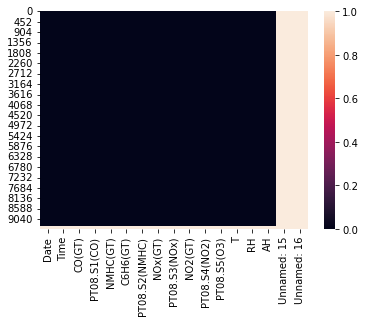

In [9]:
sns.heatmap(df.isnull())

<AxesSubplot:>

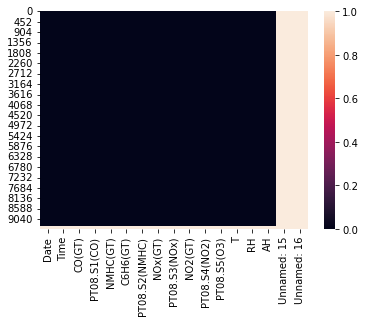

In [10]:
sns.heatmap(df.isna())

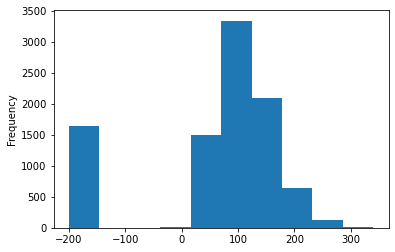

In [11]:
df['NO2(GT)'].plot.hist()
plt.show()

In [12]:
df['Date'].dtype

dtype('O')

In [13]:
df['Date'].head()

0    10-03-2004
1    10-03-2004
2    10-03-2004
3    10-03-2004
4    10-03-2004
Name: Date, dtype: object

In [14]:
df['Date'].dropna()
# Converting Date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

D:\24-Annaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-03-2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\24-Annaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-03-2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\24-Annaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-03-2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\24-Annaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-03-2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

dtype('<M8[ns]')

In [15]:
df['Date'].head()

0   2004-10-03
1   2004-10-03
2   2004-10-03
3   2004-10-03
4   2004-10-03
Name: Date, dtype: datetime64[ns]

In [16]:
df['Time'].dtype

dtype('O')

In [17]:
df['Time'].head()

0    18:00:00
1    19:00:00
2    20:00:00
3    21:00:00
4    22:00:00
Name: Time, dtype: object

In [18]:
df['Time'].dropna()
# Converting Time to datetime
df['Time'] = pd.to_datetime(df['Time'])
df['Time'].dtype

dtype('<M8[ns]')

In [19]:
df['Time'].head()

0   2022-06-17 18:00:00
1   2022-06-17 19:00:00
2   2022-06-17 20:00:00
3   2022-06-17 21:00:00
4   2022-06-17 22:00:00
Name: Time, dtype: datetime64[ns]

In [20]:
df['day'] = df['Date'].apply(lambda x: x.day)
df['month'] = df['Date'].apply(lambda x: x.month)
df['year'] = df['Date'].apply(lambda x: x.year)

In [21]:
df['hour'] = df['Time'].apply(lambda x: x.hour)
df['minute'] = df['Time'].apply(lambda x: x.minute)
df['second'] = df['Time'].apply(lambda x: x.second)

In [22]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),...,RH,AH,Unnamed: 15,Unnamed: 16,day,month,year,hour,minute,second
0,2004-10-03,2022-06-17 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,...,48.9,0.7578,NaN,NaN,3.0,10.0,2004.0,18.0,0.0,0.0
1,2004-10-03,2022-06-17 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,...,47.7,0.7255,NaN,NaN,3.0,10.0,2004.0,19.0,0.0,0.0
2,2004-10-03,2022-06-17 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,...,54.0,0.7502,NaN,NaN,3.0,10.0,2004.0,20.0,0.0,0.0
3,2004-10-03,2022-06-17 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,...,60.0,0.7867,NaN,NaN,3.0,10.0,2004.0,21.0,0.0,0.0
4,2004-10-03,2022-06-17 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,...,59.6,0.7888,NaN,NaN,3.0,10.0,2004.0,22.0,0.0,0.0


In [23]:
df = df.drop(['Date', 'Time'],axis=1)

In [24]:
# USED TO GET THE TOTAL COUNT OF THE NULL VALUES IN EACH SPECIFIC COLUMNS
print("Number of null values in each column: \n{}".format(df.isnull().sum()))

Number of null values in each column: 
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
day               114
month             114
year              114
hour              114
minute            114
second            114
dtype: int64


In [25]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mean())
# Replacing all null value

In [26]:
# USED TO GET THE TOTAL COUNT OF THE NULL VALUES IN EACH SPECIFIC COLUMNS
print("Number of null values in each column: \n{}".format(df.isnull().sum()))

Number of null values in each column: 
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9471
Unnamed: 16      9471
day                 0
month               0
year                0
hour                0
minute              0
second              0
dtype: int64


In [27]:
feat=df.drop(['AH', 'Unnamed: 15', 'Unnamed: 16'],axis=1)
val=df['AH'].values

In [28]:
(train_feat, test_feat, train_classes, test_classes) = train_test_split(feat, val, random_state=100)
m = DecisionTreeRegressor().fit(train_feat, train_classes)

In [29]:
ypred = m.predict(test_feat)
print("MSE:",metrics.mean_squared_error(test_classes, ypred))

MSE: 0.0014129085177364865


In [ ]:
fig = plt.figure(figsize=(25, 20))
_= tree.plot_tree(m,
               feature_names = feat.values,
                  class_names = val,
               filled = True)

In [ ]:
text_representation = tree.export_text(m)
print(text_representation)